## Red de distribución energética


a. Defina el modelo lineal con notación matemática, escríbalo con fórmulas matemáticas en su trabajo.

Este es un problema de distribución con intermediarios, donde el origen está dado por las plantas, desigandas por Guatapé (1), Porce (2), Rio Grande (3), Piedas blancas (4); por otro lado, tres son los nodos intermediarios los cuales son las subestaciones designadas por Niquía, San Rafael y una externa y el punto de llegada o destino dados por:  Cali (1), Bogotá (2), Medellín (3), Barranquilla (4), 


| Destino | Codigo  | Requerimientos |
| --- | --- | --- |
| Cali | (1) | 90 |
| Bogota | (2) | 150 |
| Medellin| (3) | 110 |
| Barranquilla | (4) | 70 |


Y cada origen o planta entrega:

| Planta  | Entrega |
| --- | --- |
| Guatapé  | 150 |
| Porce  | 115 |
| Rio grande | 110 |
| Piedas blancas  | 65 |


Y cada nodo intermediario tiene una capacidad de transporte:

| Intermedio   | Entrega |
| --- | --- |
| Niquía  | 250 |
| San Rafael | 120 |
| Externa | $\inf$ |


Sea $X_{ij}$ la cantidad de energía que se transporta desde el origen $i$ al destino $j$, y $Y_{ij}$ la cantidad de energía que se transporta desde el nodo intermediario $i$ al destino $j$. Los índices $i$ y $j$ varían de 1 a 4.  $c_{ij}$ representa el costo de transportar una unidad de producto desde el origen $i$ hasta el destino $j$ o desde el nodo intermediario $i$ hasta el destino $j$. En otras palabras, $c_{ij}$ es el costo asociado a cada ruta de transporte entre el origen y los destinos, y entre los nodos intermediarios y los destinos; y $c_i$ es el costo de transportar una unidad de producto desde el origen $i$ hasta el destino $j$ o desde el nodo intermediario $i$ hasta el destino $j$.

La cantidad de minimizar siempre es el costo total de transporte 
$$
min Z = c_{11} X_{11} + c_{12} X_{12} + c_{13} X_{13} + c_{14} X_{14} + c_{21} Y_{21}+ c_{22} Y_{22} + c_{23} Y_{23} + c_{24} Y_{24} + \\ c_{31} Y_{31} + c_{32} Y_{32} + c_{33} Y_{33} + c_{34} Y_{34} + c_{41} Y_{41} + c_{42} Y_{42}+ c_{43} Y_{43} + c_{44} Y_{44}
$$

Donde se tiene que deben haber restricciones en la oferta, la demanda, la capacidad de los nodos intermediarios y deben ser positivos, esto es:

1. Restricción en la oferta: la cantidad total de producto transportado desde el origen no puede exceder la oferta disponible en el origen, esto es:
$$
X_{11} + X_{12} + X_{13}+ X_{14} \leq D
$$
2. Restriccion en la demanda: la cantidad de producto transportada a cada destino debe satisfacer su demanda:

\begin{gather}
X_{11} + Y_{21} + Y_{31} + Y_{41} = D_1  \\
X_{12} + Y_{22} + Y_{32} + Y_{42} = D_2  \\
X_{13} + Y_{23} + Y_{33} + Y_{43} = D_3  \\
X_{14} + Y_{24} + Y_{34} + Y_{44} = D_4  \\
\end{gather}
3. Restricción en la capacidad de los nodos intermedios:  la cantidad de producto que se transporta a través de cada nodo no puede exceder su capacidad de transporte:

\begin{gather}
X_{11} + X_{12} + X_{13} + X_{14} \leq C_1\\
Y_{21} + Y_{22} + Y_{23} + Y_{24} \leq C_2\\
Y_{31} + Y_{32} + Y_{33} + Y_{34} \leq C_3\\
\end{gather}
4. Restricción de no negatividad: la cantidad de producto transportada no puede ser negativa:
\begin{gather}
X_{ij} \geq 0 \\
Y_{ij} \geq 0
\end{gather}

Donde $D$ es la oferta disponible en el origen, de $D_1$ a $D_4$ son las demandas de los destinos, de $C_1$ a $C_3$ son las capacidades de los nodos intermediarios.

b. Para resolver este problema, se consideran los siguientes pasos:
1. Importar los modulos y librerías necesarias.
2. Crear el modelo.
3. Definir el conjunto de parámetros
4. Definir las variables de decisión.
5. Definir la función objetivo.
6. Añadir las restricciones al problema
7. Solucionar el modelo
8. Mostras la solución al modelo.

In [1]:
from docplex.mp.model import Model

In [2]:
modelo = Model(name='Distribucion_energia')

In [5]:
origen = [1,2,3,4] # Cuatro orígenes, en este caso son las plantas de energía
nodos_intermedios = [5,6,7] # Tres subestaciones 
destino = [8,9,10,11] # Cuatro ciudades que necesitan ser alimentadas

# Matriz de la capacidad de transporte de cada uno de los nodos:
trans_capacity = {(1, 5): 100, (1, 6): 150, (1, 7): 200, (2, 5): 200, (2, 6): 250, (2, 7): 200,
                  (3, 5): 300, (3, 6): 200, (3, 7): 200, (4, 5): 150, (4, 6): 400, (4, 7): 200,
                  (5, 8): 100, (5, 9): 200, (5, 10):250, (5,11): 500, (6, 8): 150, (6, 9): 250,
                  (6, 10):200, (6, 11):200, (7, 8): 200, (7, 9): 300, (7, 10):130, (7, 11):200}
# Matriz de costo del transporte 
trans_cost = {(1, 5): 5, (1, 6): 2, (1, 7): 7 , (2, 5):3, (2, 6): 6, (2, 7): 6,
              (3, 5): 6, (3, 6): 1, (3, 7): 2, (4, 5): 4, (4, 6): 3, (4, 7): 6,
              (5, 8): 5, (5, 9): 6, (5, 10):8, (5,11): 5, (6, 8): 6, (6, 9): 5,
              (6, 10):5, (6, 11):2, (7, 8): 4, (7, 9): 3, (7, 10):3, (7, 11):9}


city_needs = {8: 90, 9: 150, 10:110, 11: 70}
# variables de decisión:

trans_vars  = { (i,j): modelo.continuous_var(lb=0, name=f'trans_{i}_{j}')
               for i in origen for j in nodos_intermedios   
}
trans_vars2 = { (i,j): modelo.continuous_var(lb=0, name=f'trans2_{i}_{j}')
               for i in nodos_intermedios for j in destino
}
# Funcion objetivo
modelo.minimize(modelo.sum(trans_cost[i, j] * trans_vars[i, j] for i in origen for j in nodos_intermedios) +
               modelo.sum(trans_cost[i, j] * trans_vars2[i, j] for i in nodos_intermedios for j in destino))


In [6]:
# Define la energía que cada ciudad necesita
city_needs = {8: 300, 9: 200, 10: 400, 11: 350}

# Restricción: La cantidad de energía enviada a cada ciudad debe ser igual o mayor a la que necesita. 
for k in destino:
    modelo.add_constraint(modelo.sum(trans_vars2[j, k] for j in nodos_intermedios) >= city_needs[k])

# Restricción: La cantidad de energía enviada desde cada planta de energía y subestación no puede exceder su capacidad

for i in origen:
    for j in nodos_intermedios:
        modelo.add_constraint(trans_vars[i, j] <= trans_capacity[(i, j)])
for i in nodos_intermedios:
    for j in destino:
        modelo.add_constraint(trans_vars2[i, j] <= trans_capacity[(i, j)])

# Restricción: La cantidad total de energía enviar desde cada planta de energía y subestación debe ser igual a la cantidad
#             total de energía recibida por cada ciudad
for k in destino:
    modelo.add_constraint(modelo.sum(trans_vars2[j, k] for j in nodos_intermedios) ==
                         modelo.sum(trans_vars[i, j] for i in origen for j in nodos_intermedios if (i, j) in trans_capacity))

In [10]:
#Soluciones el modelo 
solucion = modelo.solve()
for var in trans_vars:
    print(f'{var}: {trans_vars[var].solution_value}')
    
for var in trans_vars2:
    print(f'{var}: {trans_vars2[var].solution_value}')


(1, 5): 0
(1, 6): 150.0
(1, 7): 0
(2, 5): 0
(2, 6): 0
(2, 7): 0
(3, 5): 0
(3, 6): 200.0
(3, 7): 50.0
(4, 5): 0
(4, 6): 0
(4, 7): 0
(5, 8): 100.0
(5, 9): 0
(5, 10): 70.0
(5, 11): 200.0
(6, 8): 100.0
(6, 9): 100.0
(6, 10): 200.0
(6, 11): 200.0
(7, 8): 200.0
(7, 9): 300.0
(7, 10): 130.0
(7, 11): 0


c. Realice una gráfica inicial del problema con las ubicaciones de las ciudades, de las subestaciones y de las hidroeléctricas con distinto marcador y color, y una gráfica de la solución del problema mostrando las rutas asignadas

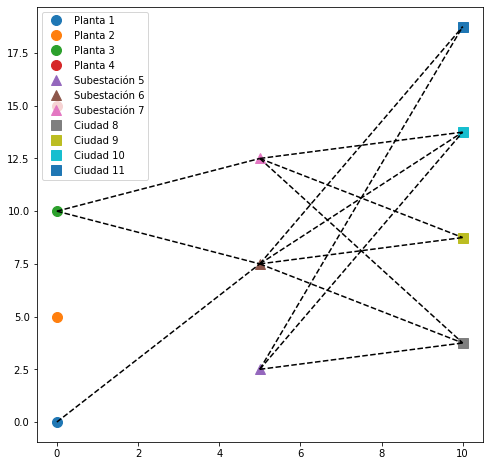

In [21]:
import matplotlib.pyplot as plt

# Coordinates of the locations
coords = {1: (0, 0), 2: (0, 5), 3: (0, 10), 4: (0, 15), 5: (5, 2.5), 6: (5, 7.5), 7: (5, 12.5), 8: (10, 3.75),
          9: (10, 8.75), 10: (10, 13.75), 11: (10, 18.75)}

# Plot the locations
plt.figure(figsize=(8, 8))
for i, loc in coords.items():
    if i in [1, 2, 3, 4]:
        plt.plot(loc[0], loc[1], 'o', markersize=10, label=f'Planta {i}')
    elif i in [5, 6, 7]:
        plt.plot(loc[0], loc[1], '^', markersize=10, label=f'Subestación {i}')
    else:
        plt.plot(loc[0], loc[1], 's', markersize=10, label=f'Ciudad {i}')
plt.legend()

# Plot the optimal routes
for i, j in trans_vars:
    if trans_vars[i, j].solution_value > 0:
        plt.plot([coords[i][0], coords[j][0]], [coords[i][1], coords[j][1]], 'k--')
for i, j in trans_vars2:
    if trans_vars2[i, j].solution_value > 0:
        plt.plot([coords[i][0], coords[j][0]], [coords[i][1], coords[j][1]], 'k--')

plt.show()


d) Realice un resumen en una tabla de datos por medio de código Python (usar la librería pandas), dónde se pueda ver las cantidades que se distribuirán desde cada planta y cada CEDI. En una celda de texto realice un análisis de los resultados y al menos dos conclusiones referentes al uso del método, y una conclusión de posibles trabajos complementarios que usted considere se puedan desarrollar posteriormente para mejorar el trabajo o para hacerlo más aplicable o cercano a la realidad.

In [20]:
import pandas as pd

# Extract solution information
total_cost = solucion.get_objective_value()
transport_df = pd.DataFrame.from_dict(trans_vars, orient='index', columns=['Variable'])
transport_df['Solution'] = transport_df['Variable'].apply(lambda x: x.solution_value)
transport_df = transport_df[transport_df['Solution'] > 0]

# Create summary table
summary_table = pd.DataFrame(columns=['Planta fuente', 'Destino', 'Energia'])
for index, row in transport_df.iterrows():
    source = index[0]
    destination = index[1]
    energy = row['Solution']
    summary_table = summary_table.append({'Planta fuente': source, 'Destino': destination, 'Energia': energy}, ignore_index=True)

# Print summary table
print(summary_table)


   Planta fuente  Destino  Energia
0            1.0      6.0    150.0
1            3.0      6.0    200.0
2            3.0      7.0     50.0


### Conclusiones:

1. Este es un problema común en cualquier empresa, la idea de minimizar costo siempre está presente en cualquier modelo de negocio, sea energético de cualquier otra índole, dando como aplicabilidad un sin fin de situaciones.
2. Al considerar una mejor podría ser considerar posiblemente más ciudades, con mayores plantas, aquellas personas que tienen hidroeléctricas, o energía renovable por medio de paneles solares, con el fin de mejorar la red de distribución.